In [1]:
!pip install --quiet yfinance plotly pandas lxml html5lib

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [23]:
# clean Revenue column: remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# drop nulls or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# show last 5 rows
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,nan
52,2009-09-30,46.0
53,2009-06-30,27.0


In [7]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [8]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, "html.parser")

In [10]:
import pandas as pd

# extract all tables from the html_data
tables = pd.read_html(html_data)

# the Tesla Quarterly Revenue table is at index 1
tesla_revenue = tables[1]

# First, check what columns are actually available
print("Available columns:", tesla_revenue.columns.tolist())

# Assuming the first column is the date and the second column is revenue
# Rename the columns to what we need
tesla_revenue = tesla_revenue.rename(columns={tesla_revenue.columns[0]: "Date", 
                                             tesla_revenue.columns[1]: "Revenue"})

# clean the Revenue column
tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .astype(str)
    .replace("-", None)
    .str.replace(r"[\$,]", "", regex=True)
    .astype(float)
)

tesla_revenue.head()

Available columns: ['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1']


/var/folders/9l/sg7x4qs561zccj7tjbzzbvkc0000gn/T/ipykernel_82917/3033567067.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [12]:
# First check the data type of the Revenue column
# If it's not string type, convert it to string before applying str methods
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].astype(str).str.replace(',|\$',"",regex=True)

# After removing the currency symbols and commas, you might want to convert it back to numeric
# tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

In [13]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [14]:
# clean Revenue column: remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "", regex=True)

# drop nulls or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# show last 5 rows
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,nan
52,2009-09-30,46.0
53,2009-06-30,27.0


In [15]:
gme = yf.Ticker("GME")

In [16]:
gme_data = gme.history(period="max")

In [18]:
# Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data dataframe using the head function
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [19]:
import requests

url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url2).text

In [20]:
from bs4 import BeautifulSoup

soup_2 = BeautifulSoup(html_data_2, "html.parser")

In [21]:
import pandas as pd

# extract tables from the html_data_2 text
tables = pd.read_html(html_data_2)

# the GameStop Quarterly Revenue table is at index 1
gme_revenue = tables[1].iloc[:, :2]
gme_revenue.columns = ["Date", "Revenue"]

# clean the Revenue column: remove $ and commas, drop nulls/empties
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .astype(str)
    .replace("-", None)
    .str.replace(r"[\$,]", "", regex=True)
)

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# optional: convert Date to datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue.sort_values("Date", inplace=True)

# check last 5 rows for screenshot
gme_revenue.tail()

/var/folders/9l/sg7x4qs561zccj7tjbzzbvkc0000gn/T/ipykernel_82917/1607484667.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data_2)


,Date,Revenue
4,2019-04-30,1548.0
3,2019-07-31,1286.0
2,2019-10-31,1439.0
1,2020-01-31,2194.0
0,2020-04-30,1021.0


In [22]:
gme_revenue.tail()

,Date,Revenue
4,2019-04-30,1548.0
3,2019-07-31,1286.0
2,2019-10-31,1439.0
1,2020-01-31,2194.0
0,2020-04-30,1021.0


In [27]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


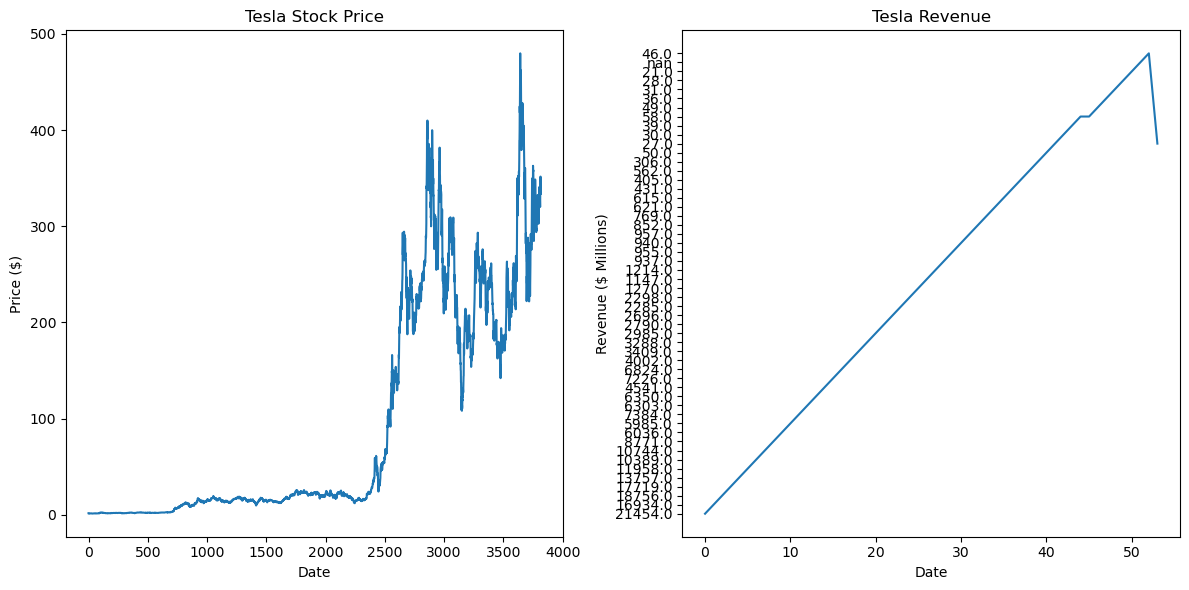

In [29]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

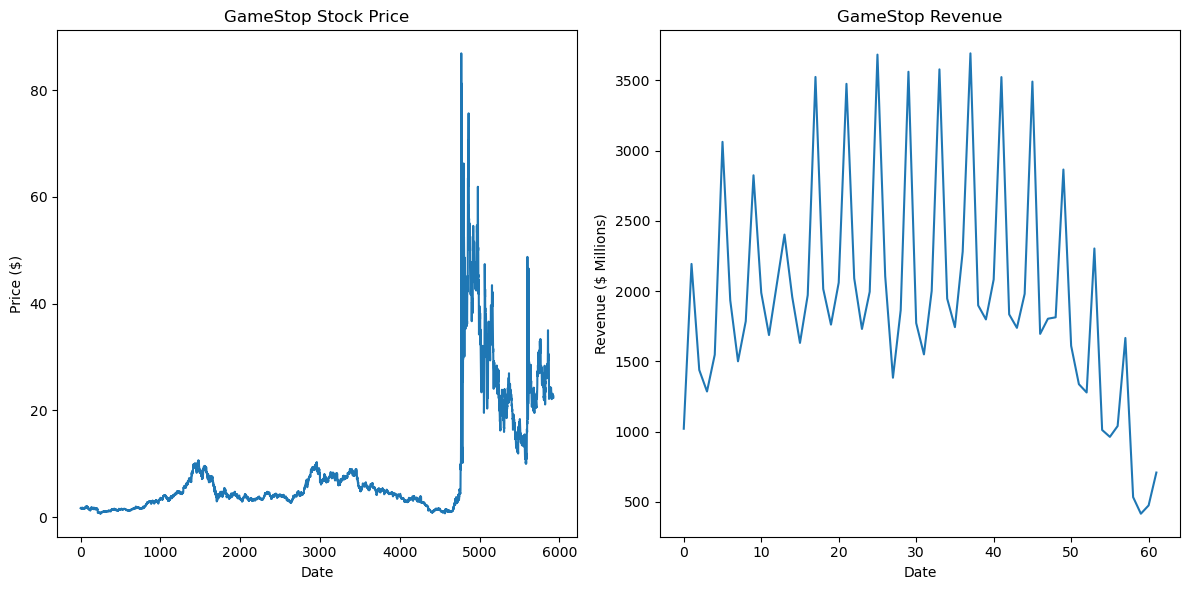

In [30]:
make_graph(gme_data, gme_revenue, 'GameStop')